In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [179]:
df = pd.read_csv('company_nps_data.csv', encoding='cp949')
df.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151


## 시각화의 용이성을 위해 먼저 년도 칼럼과 월 칼럼을 합친 연월 칼럼 만들기

In [180]:
# 먼저 월 칼럼에 0을 추가한다. ex 07월, 03월, ...
df['월'] = df['월'].astype(str)
df['월'] = df['월'].str.zfill(2)
df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,07,8912380,36
1,123464,1760695,2018,03,942380,5
2,342124,3221341,2018,07,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151
...,...,...,...,...,...,...
99796,171439,4630622,2017,02,2402740,11
99797,239388,1045021,2018,10,1428800,9
99798,272304,181898,2018,03,392560,4
99799,362194,2100218,2018,12,874780,3


In [181]:
df['년도'] = df['년도'].astype(str)
df['연월'] = df['년도']+df['월']
df.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,연월
0,233757,41688077,2018,07,8912380,36,201807
1,123464,1760695,2018,03,942380,5,201803
2,342124,3221341,2018,07,781180,4,201807
3,386420,4815584,2015,11,3795900,14,201511
4,129243,9799736,2018,10,40724680,151,201810


## 3년치 이상의 데이터가 존재하는 기업만 분석
연매출이 증가하고 있는지 확인하기 위해서는 3년치 이상의 데이터가 필요하다고 결론

In [182]:
# 3년치 이상의 데이터가 존재하는 기업만 분석
회사_2015_list = set(df[df['년도']=='2015']['회사ID'].unique())
회사_2016_list = set(df[df['년도']=='2016']['회사ID'].unique())
회사_2017_list = set(df[df['년도']=='2017']['회사ID'].unique())
회사_2018_list = set(df[df['년도']=='2018']['회사ID'].unique())
회사_2019_list = set(df[df['년도']=='2019']['회사ID'].unique())

Group1 = 회사_2015_list & 회사_2016_list & 회사_2017_list
Group2 = 회사_2015_list & 회사_2016_list & 회사_2018_list
Group3 = 회사_2015_list & 회사_2016_list & 회사_2019_list
Group4 = 회사_2015_list & 회사_2017_list & 회사_2018_list
Group5 = 회사_2015_list & 회사_2017_list & 회사_2019_list
Group6 = 회사_2015_list & 회사_2018_list & 회사_2019_list

Group7 = 회사_2016_list & 회사_2017_list & 회사_2018_list
Group8 = 회사_2016_list & 회사_2017_list & 회사_2019_list
Group9 = 회사_2016_list & 회사_2018_list & 회사_2019_list

Group10 = 회사_2017_list & 회사_2018_list & 회사_2019_list

회사_3년치이상 = Group1 | Group2 | Group3 | Group4 | Group5 | Group6 | Group7 | Group8 | Group9 | Group10

len(회사_3년치이상)

1645

In [183]:
회사_3년치이상 = list(회사_3년치이상)

In [184]:
# 회사_3년치이상의 인덱스만 추출
t_list = []
for num in 회사_3년치이상:
    include_idx = df[df['회사ID'] == num].index.to_list()
    for i in include_idx:
        t_list.append(i)
t_list

[1799,
 3346,
 10584,
 11046,
 11112,
 11326,
 12737,
 13213,
 19409,
 21944,
 25571,
 27175,
 27265,
 27694,
 28382,
 31165,
 37003,
 37554,
 37896,
 40110,
 42579,
 50766,
 52327,
 54061,
 56353,
 56473,
 60906,
 61495,
 73281,
 80332,
 81124,
 87382,
 87619,
 87839,
 88647,
 89276,
 91786,
 91821,
 1791,
 4547,
 7984,
 8650,
 15840,
 18975,
 20336,
 23421,
 25139,
 29645,
 31024,
 32096,
 34541,
 43647,
 44515,
 50424,
 56354,
 57122,
 57871,
 58309,
 62004,
 62614,
 64854,
 65017,
 65193,
 65842,
 69390,
 78077,
 80365,
 84044,
 86314,
 86760,
 88230,
 90935,
 91146,
 92238,
 94662,
 95973,
 10363,
 14138,
 18055,
 19232,
 24861,
 28494,
 29153,
 29250,
 29553,
 31505,
 37539,
 42513,
 43247,
 48649,
 54018,
 54675,
 60435,
 64238,
 64252,
 73771,
 77390,
 78081,
 79344,
 84488,
 93879,
 95144,
 1805,
 2648,
 5758,
 8651,
 14098,
 16004,
 16699,
 19098,
 22624,
 24421,
 27465,
 30323,
 34845,
 35383,
 38055,
 40191,
 46170,
 48702,
 53953,
 55821,
 56930,
 58827,
 61844,
 62608,
 6

In [185]:
df2 = df.iloc[t_list]
df2

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,연월
1799,487425,136349,2016,02,624040,4,201602
3346,487425,99001,2017,12,632680,4,201712
10584,487425,136349,2016,09,634480,4,201609
11046,487425,99001,2017,10,632680,4,201710
11112,487425,99001,2017,06,634480,4,201706
...,...,...,...,...,...,...,...
71025,434171,3123093,2017,01,1169000,4,201701
74316,434171,2776277,2019,05,1401020,4,201905
84674,434171,3123093,2017,11,1217160,4,201711
90977,434171,3123093,2017,08,1217160,4,201708


## 연매출액이 0원 이하인 기업들 제거

In [186]:
df2.sort_values('연매출액')

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,연월
37489,432911,-7882176,2017,11,1687760,5,201711
67889,432911,-7882176,2017,12,1687760,5,201712
64094,432911,-7882176,2017,03,2042620,6,201703
56276,432911,-7882176,2017,04,2042620,6,201704
51605,432911,-7882176,2017,06,2042620,6,201706
...,...,...,...,...,...,...,...
88487,419945,10058868796,2019,06,870767520,2757,201906
25614,419945,10058868796,2019,07,928921380,2762,201907
13109,419945,10058868796,2019,04,870665760,2765,201904
70918,419945,10058868796,2019,08,927833840,2753,201908


In [187]:
df2[df2['연매출액']<=0]['회사ID']

7516     432911
7617     432911
8595     432911
23150    432911
36048    432911
37489    432911
51605    432911
56276    432911
64094    432911
67889    432911
93521    432911
95251    432911
Name: 회사ID, dtype: int64

In [188]:
df2 = df2[df2['연매출액']>=0]

## 월별 직원 수 혹은 월별 연금 보험료가 0인 기업들 제거

In [189]:
df2[(df2['월별_직원수']==0) | (df2['월별_연금보험료']==0)]['회사ID'].unique()

array([291968], dtype=int64)

In [190]:
df2[df2['회사ID']==291968]

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,연월
5855,291968,5015520,2017,10,717200,3,201710
19032,291968,4059302,2016,09,687600,3,201609
20459,291968,2694487,2015,12,774900,3,201512
23641,291968,5015520,2017,07,717200,3,201707
24049,291968,5015520,2017,06,687600,3,201706
31544,291968,5015520,2017,03,687600,3,201703
31617,291968,5015520,2017,01,687600,3,201701
33239,291968,4059302,2016,08,687600,3,201608
33416,291968,4059302,2016,11,687600,3,201611
36190,291968,5015520,2017,04,687600,3,201704


In [191]:
df2 = df2[df2['회사ID']!=291968]

In [192]:
df2

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,연월
1799,487425,136349,2016,02,624040,4,201602
3346,487425,99001,2017,12,632680,4,201712
10584,487425,136349,2016,09,634480,4,201609
11046,487425,99001,2017,10,632680,4,201710
11112,487425,99001,2017,06,634480,4,201706
...,...,...,...,...,...,...,...
71025,434171,3123093,2017,01,1169000,4,201701
74316,434171,2776277,2019,05,1401020,4,201905
84674,434171,3123093,2017,11,1217160,4,201711
90977,434171,3123093,2017,08,1217160,4,201708


In [193]:
df2.sort_values(by=['회사ID','연월'])

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,연월
19588,14271,1199495,2015,11,2571840,11,201511
44251,14271,1199495,2015,12,3558780,15,201512
39783,14271,4257715,2016,01,3358340,15,201601
27519,14271,4257715,2016,02,3142340,14,201602
4503,14271,4257715,2016,03,3016340,13,201603
...,...,...,...,...,...,...,...
80878,516653,1500046,2018,08,672380,5,201808
1653,516653,1500046,2018,09,672380,5,201809
58366,516653,1500046,2018,10,672380,5,201810
12394,516653,1500046,2018,11,672380,5,201811


## 전년도(기록연도) 대비 연매출액 증감률 칼럼을 추가

In [495]:
df2['전년도(기록연도)_대비_매출액_증감률'] = df2.sort_values(['년도','연월']).groupby('회사ID')['연매출액'].pct_change()

In [496]:
df2 = df2[['회사ID','년도','월','연월','월별_연금보험료','월별_직원수','연매출액','전년도(기록연도)_대비_매출액_증감률']]
df2

,회사ID,년도,월,연월,월별_연금보험료,월별_직원수,연매출액,전년도(기록연도)_대비_매출액_증감률
1799,487425,2016,02,201602,624040,4,136349,0.000000
3346,487425,2017,12,201712,632680,4,99001,0.000000
10584,487425,2016,09,201609,634480,4,136349,0.000000
11046,487425,2017,10,201710,632680,4,99001,0.000000
11112,487425,2017,06,201706,634480,4,99001,0.000000
...,...,...,...,...,...,...,...,...
71025,434171,2017,01,201701,1169000,4,3123093,-0.142236
74316,434171,2019,05,201905,1401020,4,2776277,0.000000
84674,434171,2017,11,201711,1217160,4,3123093,0.000000
90977,434171,2017,08,201708,1217160,4,3123093,0.000000


In [225]:
# 전년도(기록연도) 대비 매출액 증감률만 보기
cond1 = (df2['전년도(기록연도)_대비_매출액_증감률'] != 0)
df3 = df2[cond1]
df3

,회사ID,년도,월,연월,월별_연금보험료,월별_직원수,연매출액,전년도(기록연도)_대비_매출액_증감률
40110,487425,2016,01,201601,624040,4,136349,-0.377166
81124,487425,2018,01,201801,632680,4,163475,0.651246
87619,487425,2017,01,201701,634480,4,99001,-0.273915
91821,487425,2015,11,201511,624040,4,218917,NaN
29645,323588,2016,01,201601,1767860,10,3477394,0.170688
...,...,...,...,...,...,...,...,...
83622,442361,2016,01,201601,6913600,35,6566801,NaN
9420,434171,2015,11,201511,1244680,5,3604344,NaN
50583,434171,2016,01,201601,1112300,4,3640971,0.010162
68902,434171,2019,01,201901,979820,3,2776277,-0.111049


In [227]:
df3 = df3.sort_values(['회사ID','연월'])
df3

,회사ID,년도,월,연월,월별_연금보험료,월별_직원수,연매출액,전년도(기록연도)_대비_매출액_증감률
19588,14271,2015,11,201511,2571840,11,1199495,NaN
39783,14271,2016,01,201601,3358340,15,4257715,2.549590
27743,14271,2017,01,201701,3412760,15,5005248,0.175571
87826,14271,2018,01,201801,3851360,18,8388401,0.675921
6456,14271,2019,01,201901,4519140,22,9039340,0.077600
...,...,...,...,...,...,...,...,...
86889,515264,2017,01,201701,793680,5,2074820,0.393132
70988,515264,2018,01,201801,743100,5,2422405,0.167525
15828,516653,2016,01,201601,413260,4,1745520,NaN
52813,516653,2017,01,201701,449260,4,1956460,0.120847


In [228]:
df3['전년도(기록연도)_대비_매출액_증감률(%)'] = df3['전년도(기록연도)_대비_매출액_증감률'] * 100
df3.drop('전년도(기록연도)_대비_매출액_증감률', axis=1, inplace=True)

In [229]:
df3

,회사ID,년도,월,연월,월별_연금보험료,월별_직원수,연매출액,전년도(기록연도)_대비_매출액_증감률(%)
19588,14271,2015,11,201511,2571840,11,1199495,NaN
39783,14271,2016,01,201601,3358340,15,4257715,254.958962
27743,14271,2017,01,201701,3412760,15,5005248,17.557140
87826,14271,2018,01,201801,3851360,18,8388401,67.592115
6456,14271,2019,01,201901,4519140,22,9039340,7.759989
...,...,...,...,...,...,...,...,...
86889,515264,2017,01,201701,793680,5,2074820,39.313150
70988,515264,2018,01,201801,743100,5,2422405,16.752538
15828,516653,2016,01,201601,413260,4,1745520,NaN
52813,516653,2017,01,201701,449260,4,1956460,12.084651


## 전처리 방법 고민 1
- 가설: 전년(기록연도) 대비 매출액이 한번이라도 마이너스 성장하거나 성장 정체 한다면 유니콘 기업이 아니다.

In [281]:
tdf = df3[df3['전년도(기록연도)_대비_매출액_증감률(%)'] <= 0]
drop_id_list = tdf['회사ID'].unique().tolist()
tdf

,회사ID,년도,월,연월,월별_연금보험료,월별_직원수,연매출액,전년도(기록연도)_대비_매출액_증감률(%)
53678,59533,2017,01,201701,552500,6,124299,-40.172409
42318,122968,2016,01,201601,15053500,73,26858719,-28.214758
80832,122968,2018,01,201801,13488300,63,31514468,-4.495604
71239,122983,2016,01,201601,12375020,62,20292461,-16.074402
41933,122983,2017,01,201701,11879000,59,9470987,-53.327558
...,...,...,...,...,...,...,...,...
92306,512308,2018,01,201801,4770360,16,3562376,-25.370870
70733,513218,2017,01,201701,1177540,9,2482268,-1.853317
36883,514152,2016,01,201601,3004520,9,2088582,-7.471335
97165,514152,2018,01,201801,3225580,10,2578014,-0.368380


In [285]:
sum(tdf['전년도(기록연도)_대비_매출액_증감률(%)'].isna())

0

In [249]:
# drop_id_list의 index만 추출
drop_index_list = []
for num in drop_id_list:
    idx = df2[df2['회사ID'] == num].index.to_list()
    for i in idx:
        drop_index_list.append(i)
drop_index_list

[3367,
 10954,
 13010,
 18856,
 18937,
 19285,
 20902,
 24473,
 25182,
 31826,
 33191,
 36398,
 40102,
 40469,
 41007,
 43813,
 43843,
 45709,
 48125,
 51485,
 51779,
 53678,
 61611,
 61724,
 62010,
 62021,
 62834,
 64511,
 64743,
 67946,
 75035,
 77746,
 79206,
 82121,
 83927,
 88300,
 91451,
 97113,
 1219,
 2344,
 4209,
 7724,
 17932,
 18925,
 19130,
 21536,
 23094,
 34220,
 42318,
 46205,
 46401,
 51766,
 53686,
 58402,
 59609,
 61827,
 63012,
 66825,
 71914,
 75310,
 75783,
 78259,
 80832,
 81307,
 87315,
 87317,
 87994,
 90264,
 90781,
 91371,
 91846,
 91905,
 93111,
 93189,
 94461,
 99189,
 1681,
 4126,
 8704,
 16201,
 19935,
 33185,
 36293,
 41933,
 47760,
 47779,
 52163,
 55650,
 58141,
 60317,
 62178,
 68099,
 71239,
 73593,
 81166,
 81560,
 84637,
 85665,
 86957,
 92895,
 94090,
 98323,
 3065,
 9782,
 13226,
 18202,
 21089,
 21551,
 28229,
 37263,
 40437,
 45948,
 53075,
 57785,
 59108,
 60871,
 64949,
 67729,
 67881,
 68067,
 70610,
 71714,
 73418,
 73782,
 74511,
 77045,
 7

In [268]:
df4 = df2.drop(index=drop_index_list).sort_values(['회사ID','연월'])
df4

,회사ID,년도,월,연월,월별_연금보험료,월별_직원수,연매출액,전년도(기록연도)_대비_매출액_증감률
19588,14271,2015,11,201511,2571840,11,1199495,NaN
44251,14271,2015,12,201512,3558780,15,1199495,0.00000
39783,14271,2016,01,201601,3358340,15,4257715,2.54959
27519,14271,2016,02,201602,3142340,14,4257715,0.00000
4503,14271,2016,03,201603,3016340,13,4257715,0.00000
...,...,...,...,...,...,...,...,...
79838,515264,2018,08,201808,763720,5,2422405,0.00000
52591,515264,2018,09,201809,763720,5,2422405,0.00000
94356,515264,2018,10,201810,763720,5,2422405,0.00000
26278,515264,2018,11,201811,763720,5,2422405,0.00000


In [438]:
df4['회사ID'].nunique()

457

In [278]:
df4['회사ID'] = df4['회사ID'].astype(str)

In [279]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15251 entries, 19588 to 5181
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   회사ID                  15251 non-null  object 
 1   년도                    15251 non-null  object 
 2   월                     15251 non-null  object 
 3   연월                    15251 non-null  object 
 4   월별_연금보험료              15251 non-null  int64  
 5   월별_직원수                15251 non-null  int64  
 6   연매출액                  15251 non-null  int64  
 7   전년도(기록연도)_대비_매출액_증감률  14794 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 1.0+ MB


<AxesSubplot:xlabel='년도', ylabel='연매출액'>

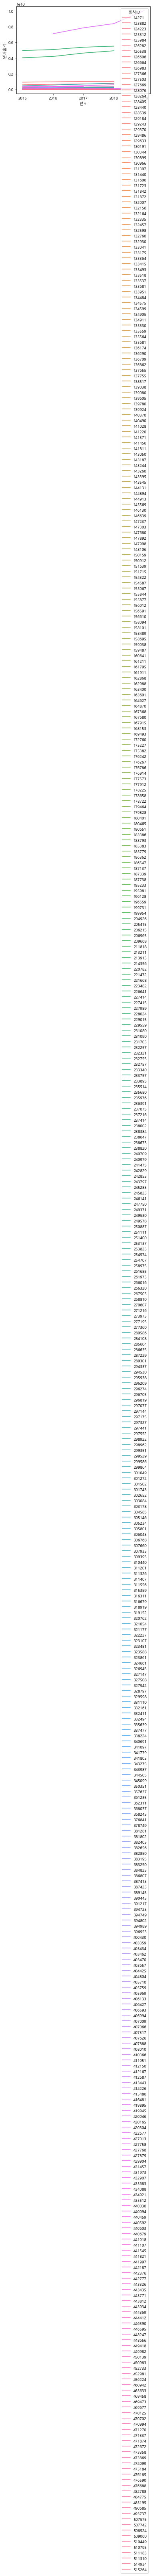

In [280]:
sns.lineplot(data=df4, x='년도',y='연매출액',hue='회사ID')

<AxesSubplot:xlabel='년도', ylabel='연매출액'>

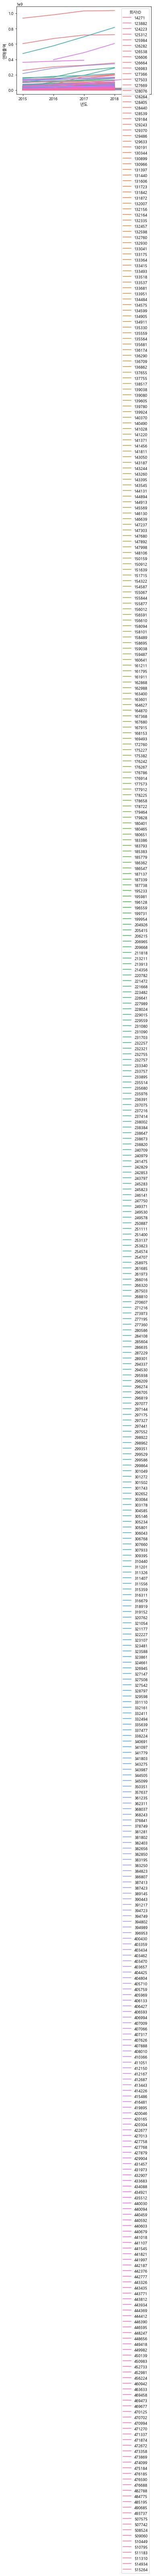

In [289]:
sns.lineplot(data=df4[df4['연매출액']<(10**10)*0.2], x='년도',y='연매출액',hue='회사ID')

In [328]:
df4.corr()

,월별_연금보험료,월별_직원수,연매출액,전년도(기록연도)_대비_매출액_증감률
월별_연금보험료,1.000000,0.957639,0.849157,-0.003869
월별_직원수,0.957639,1.000000,0.744206,-0.004038
연매출액,0.849157,0.744206,1.000000,-0.002200
전년도(기록연도)_대비_매출액_증감률,-0.003869,-0.004038,-0.002200,1.000000


<AxesSubplot:>

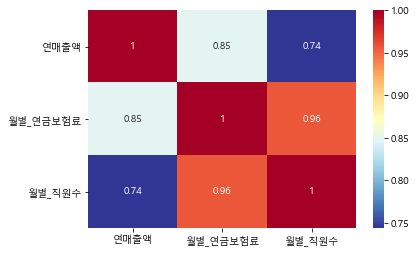

In [334]:
sns.heatmap(data=df4[['연매출액','월별_연금보험료','월별_직원수']].corr(), annot = True ,cmap='RdYlBu_r')

## 전처리 방법 고민2 (남은 기업 457개)
- 연매출 x원 이하인 기업들 제거
- 직원 수가 감소하거나 직원 수 증가가 더딘 기업들 제거
- 이미 유니콘기업을 넘어선 기업도 포함되어 있을텐데 어떻게 판단할 지 고민중

In [319]:
# 연월 데이터가 중간에 누락된 기업이 있는지 확인
df4.groupby('회사ID')[['연월']].count().sort_values(by='연월')

,연월
회사ID,
345099,14
226641,17
368037,19
419895,19
183793,20
...,...
341779,38
419945,48
14271,50


In [320]:
df4[df4['회사ID']=='345099']

,회사ID,년도,월,연월,월별_연금보험료,월별_직원수,연매출액,전년도(기록연도)_대비_매출액_증감률
39219,345099,2015,11,201511,384200,3,1233383,NaN
20974,345099,2015,12,201512,384200,3,1233383,0.000000
92213,345099,2016,01,201601,384200,3,1529633,0.240193
88252,345099,2016,02,201602,384200,3,1529633,0.000000
12718,345099,2016,03,201603,384200,3,1529633,0.000000
73979,345099,2016,04,201604,384200,3,1529633,0.000000
30361,345099,2017,05,201705,400500,3,2942047,0.923368
59898,345099,2017,06,201706,400500,3,2942047,0.000000
89698,345099,2017,07,201707,400500,3,2942047,0.000000
59709,345099,2017,08,201708,400500,3,2942047,0.000000


#### 연월 데이터가 중간에 누락된 값이 많으니 '년도'별 데이터로 그루핑하여 월별 직원수의 평균값 혹은 중앙값중에 골라서 연도별 직원 수의 증감률 변화를 보자

In [449]:
df5 = df4.groupby(['회사ID','년도'])[['월별_직원수']].agg(['median','mean']).reset_index()
df5

회사ID    년도 월별_직원수          
                   median      mean
0     123882  2016    6.0  5.666667
1     123882  2017    7.5  7.333333
2     123882  2018    8.0  7.583333
3     124223  2015    7.0  7.000000
4     124223  2016    5.0  5.500000
...      ...   ...    ...       ...
1567  514934  2017    5.5  5.416667
1568  514934  2018    7.0  6.750000
1569  515264  2016    5.0  5.083333
1570  515264  2017    5.0  5.000000
1571  515264  2018    5.0  5.000000

[1572 rows x 4 columns]

In [450]:
df5['직원수_차이'] = df5[('월별_직원수','median')] - df5[('월별_직원수','mean')]

In [451]:
df5.sort_values(by='직원수_차이')

회사ID    년도  월별_직원수                  직원수_차이
                    median         mean           
641   231090  2017   193.5   219.500000 -26.000000
1468  469458  2017  2727.0  2752.250000 -25.250000
837   294337  2018  2064.5  2086.583333 -22.083333
1470  469473  2016  2104.0  2125.333333 -21.333333
19    126538  2018  1258.5  1277.166667 -18.666667
...      ...   ...     ...          ...        ...
1179  394802  2018    78.0    69.166667   8.833333
81    129633  2017    91.0    76.416667  14.583333
123   132007  2016    86.5    70.083333  16.416667
1175  394749  2018   138.0   116.916667  21.083333
1294  419945  2016  3022.5  2945.166667  77.333333

[1572 rows x 5 columns]

In [452]:
df5['직원수_차이'].mean()

-0.11528468527514325

- 전체 직원수 차이의 평균은 -0.1수준이지만, 연도별 직원수의 중앙값과 평균값의 차이가 큰 경우가 있다.

#### -아무튼 평균과 중앙값 중에 고르려고 하는데...


2017년에 3개월분의 데이터만 있다고 가정했을 때, 2017-01 10명, 2017-02 10명, 2017-03 70명이라면, 평균으로 따지면 30명, 중앙값은 10명이다.

2018년에 5개월분의 데이터가 71명, 73명, 75명, 77명, 79명이라면 평균 75명, 중앙값도 75명

따라서 평균 기준으로 본다면 30명 -> 75명으로 150% 성장, 중앙값 기준으로 본다면 10명 -> 75명으로 750% 성장으로 보임

--------------------------
반대로 생각해 보았을 때 한 해 10명 70명 70명이었다가, 다음 해 71명, 73명, 75명, 77명, 79명이 된 경우

평균 기준으로 본다면 50명 -> 75명으로 50% 성장, 중앙값 기준으로 본다면 70명 -> 75명으로 7.14% 성장

- 그러나 유니콘 기업의 경우 위의 예처럼 한달만에 급격한 직원 증가가 있을 수 있다고 생각함. 따라서 평균으로 보는 것이 좋겠다. (평균이 이상치에 민감하게 반응하기에)

In [512]:
df5 = df4.groupby(['회사ID','년도'])[['월별_직원수']].mean().reset_index().rename(columns={'월별_직원수':'연평균_직원수'})
df5

,회사ID,년도,연평균_직원수
0,123882,2016,5.666667
1,123882,2017,7.333333
2,123882,2018,7.583333
3,124223,2015,7.000000
4,124223,2016,5.500000
...,...,...,...
1567,514934,2017,5.416667
1568,514934,2018,6.750000
1569,515264,2016,5.083333
1570,515264,2017,5.000000


In [513]:
df5['전년도(기록연도)_대비_직원수_증감률'] = df5.sort_values(['년도']).groupby('회사ID')['연평균_직원수'].pct_change()

In [514]:
df5 = df5.sort_values(['회사ID','년도'])
df5

,회사ID,년도,연평균_직원수,전년도(기록연도)_대비_직원수_증감률
0,123882,2016,5.666667,NaN
1,123882,2017,7.333333,0.294118
2,123882,2018,7.583333,0.034091
3,124223,2015,7.000000,NaN
4,124223,2016,5.500000,-0.214286
...,...,...,...,...
1567,514934,2017,5.416667,-0.097222
1568,514934,2018,6.750000,0.246154
1569,515264,2016,5.083333,NaN
1570,515264,2017,5.000000,-0.016393


## 전처리 고민3
- 직원수가 매년 지속해서 증가해야만 유니콘 기업인가?
- 매년 몇%씩 증가해야 유니콘 기업인가?
- 연평균 최소 직원 수의 기준은 몇명일까?

- 직원 수가 매해 한번이라도 역성장 했다면?

In [515]:
drop_id_list = df5[df5['전년도(기록연도)_대비_직원수_증감률'] < 0]['회사ID'].unique().tolist()

In [516]:
# drop_id_list의 index만 추출
drop_idx_list = []
for num in drop_id_list:
    idx = df4[df4['회사ID'] == num].index.to_list()
    for i in idx:
        drop_idx_list.append(i)

In [517]:
df6 = df4.drop(index=drop_idx_list).sort_values(['회사ID','년도'])
df6

,회사ID,년도,월,연월,월별_연금보험료,월별_직원수,연매출액,전년도(기록연도)_대비_매출액_증감률
3104,123882,2016,01,201601,752560,5,289034,NaN
71080,123882,2016,02,201602,642320,4,289034,0.0
19888,123882,2016,03,201603,1069820,6,289034,0.0
78783,123882,2016,04,201604,1069820,6,289034,0.0
52795,123882,2016,05,201605,1069820,6,289034,0.0
...,...,...,...,...,...,...,...,...
92190,511310,2018,08,201808,6583460,30,4118186,0.0
89862,511310,2018,09,201809,6763460,31,4118186,0.0
85068,511310,2018,10,201810,6772460,31,4118186,0.0
95447,511310,2018,11,201811,6943460,32,4118186,0.0


In [518]:
df6['회사ID'].nunique()

215

In [519]:
# drop_id_list의 index만 추출
drop_idx_list = []
for num in drop_id_list:
    idx = df5[df5['회사ID'] == num].index.to_list()
    for i in idx:
        drop_idx_list.append(i)

In [520]:
df5 = df5.drop(index=drop_idx_list).sort_values(['회사ID','년도'])

In [521]:
df5['회사ID'].nunique()

215

In [522]:
# df5와 df6 테이블을 join하자
df7 = pd.merge(df6, df5, how='inner', on=['회사ID','년도'])
df7

,회사ID,년도,월,연월,월별_연금보험료,월별_직원수,연매출액,전년도(기록연도)_대비_매출액_증감률,연평균_직원수,전년도(기록연도)_대비_직원수_증감률
0,123882,2016,01,201601,752560,5,289034,NaN,5.666667,NaN
1,123882,2016,02,201602,642320,4,289034,0.0,5.666667,NaN
2,123882,2016,03,201603,1069820,6,289034,0.0,5.666667,NaN
3,123882,2016,04,201604,1069820,6,289034,0.0,5.666667,NaN
4,123882,2016,05,201605,1069820,6,289034,0.0,5.666667,NaN
...,...,...,...,...,...,...,...,...,...,...
7112,511310,2018,08,201808,6583460,30,4118186,0.0,30.250000,0.093373
7113,511310,2018,09,201809,6763460,31,4118186,0.0,30.250000,0.093373
7114,511310,2018,10,201810,6772460,31,4118186,0.0,30.250000,0.093373
7115,511310,2018,11,201811,6943460,32,4118186,0.0,30.250000,0.093373


# 전처리 고민4
- 3년치 이상의 데이터가 있고, 전년 대비 연매출이 지속적으로 상승하며, 전년도 대비 연평균 직원 수가 0명 이상인 기업 215개
1. 유니콘의 최소한의 연매출, 최소한의 직원 수로 필터링하고
2. 이미 너무 성장한 기업을 배제하자.
3. 이후 연매출 증가율 또는 연평균지원수 증가율의 기준을 높여보는 것도 좋을듯

In [530]:
df7.to_csv('전처리용.csv',encoding='cp949')

In [3]:
df7 = pd.read_csv('전처리완료.csv', encoding='cp949')

In [33]:
cond1 = (df7['연매출액']>20000000)
cond2 = (df7['연평균_직원수']>100)
cond3 = (df7['연매출액']>100000000)

In [35]:
df7[cond1&cond2]['회사ID'].nunique()

22

In [38]:
tlist = df7[cond1 & cond2]['회사ID'].unique().tolist()

In [39]:
index_list = []
for num in tlist:
    idx = df7[df7['회사ID'] == num].index.to_list()
    for i in idx:
        index_list.append(i)

In [43]:
df7.loc[index_list]

,회사ID,년도,월,연월,월별_연금보험료,월별_직원수,연매출액,전년도(기록연도)_대비_매출액_증감률,연평균_직원수,전년도(기록연도)_대비_직원수_증감률
62,126664,2015,11,201511,225166820,740,256505233,NaN,742.000000,NaN
63,126664,2015,12,201512,225269940,744,256505233,NaN,742.000000,NaN
64,126664,2016,1,201601,226535440,750,304408150,0.186752,782.333333,0.054358
65,126664,2016,2,201602,227341300,757,304408150,0.186752,782.333333,0.054358
66,126664,2016,3,201603,227574920,764,304408150,0.186752,782.333333,0.054358
...,...,...,...,...,...,...,...,...,...,...
7086,510449,2019,8,201908,30448620,152,28299495,0.125046,145.333333,0.653081
7087,510449,2019,9,201909,30440700,154,28299495,0.125046,145.333333,0.653081
7088,510449,2019,10,201910,26208980,127,28299495,0.125046,145.333333,0.653081
7089,510449,2019,11,201911,25320800,123,28299495,0.125046,145.333333,0.653081
